# Brain Tumor Classifier

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def get_class_paths(path):
    classes = []
    class_paths = []

    for label in os.listdir(path):
        label_path =  os.path.join(path, label)

        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                classes.append(label)
                class_paths.append(image_path)
            
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df

In [6]:
tr_df = get_class_paths("./Training")

In [7]:
tr_df

,Class Path,Class
0,./Training\glioma\Tr-glTr_0000.jpg,glioma
1,./Training\glioma\Tr-glTr_0001.jpg,glioma
2,./Training\glioma\Tr-glTr_0002.jpg,glioma
3,./Training\glioma\Tr-glTr_0003.jpg,glioma
4,./Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,./Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,./Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,./Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,./Training\pituitary\Tr-pi_1455.jpg,pituitary


In [8]:
ts_df = get_class_paths('./Testing')

In [9]:
ts_df

,Class Path,Class
0,./Testing\glioma\Te-glTr_0000.jpg,glioma
1,./Testing\glioma\Te-glTr_0001.jpg,glioma
2,./Testing\glioma\Te-glTr_0002.jpg,glioma
3,./Testing\glioma\Te-glTr_0003.jpg,glioma
4,./Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,./Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,./Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,./Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,./Testing\pituitary\Te-pi_0298.jpg,pituitary


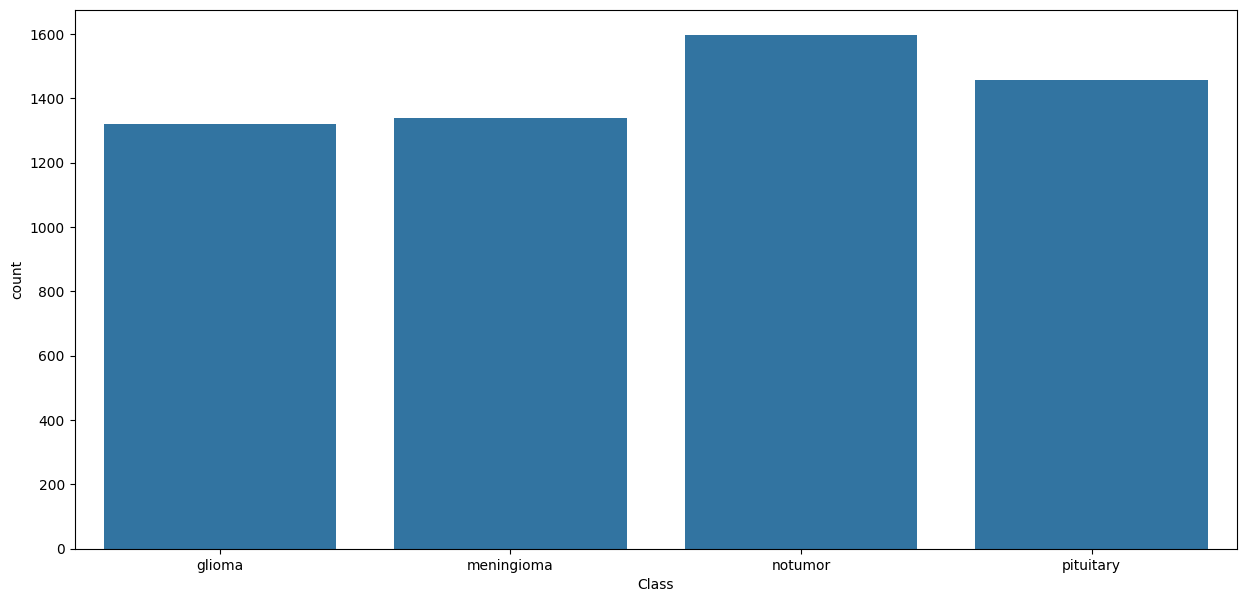

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

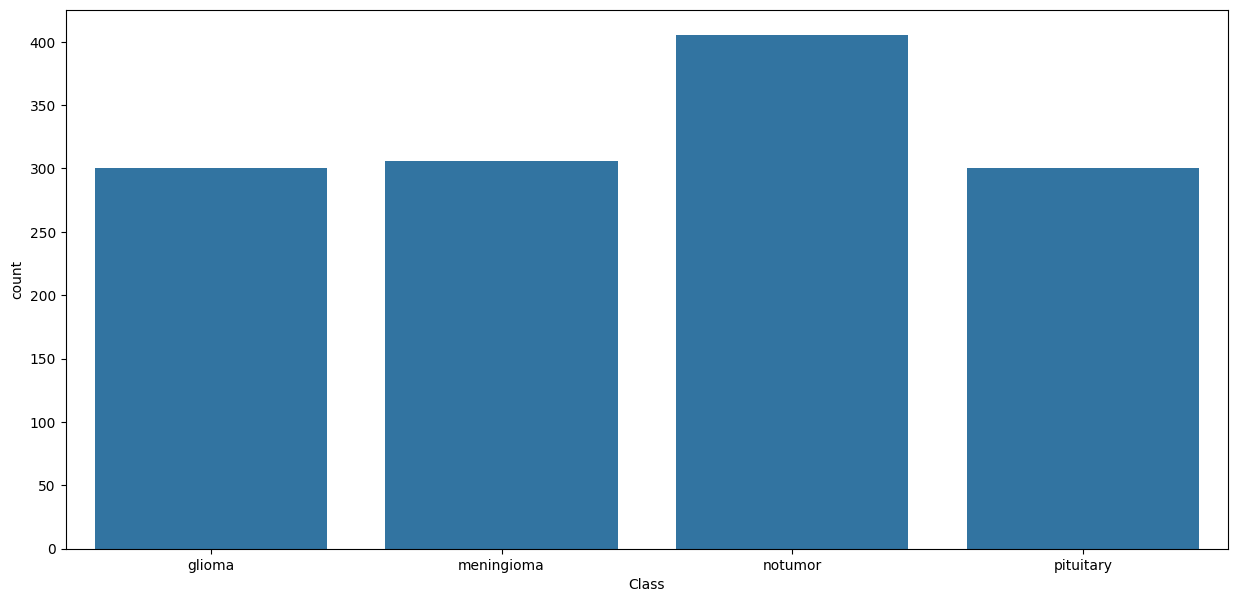

In [11]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])
# maintain proportion of classes

In [14]:
valid_df

,Class Path,Class
228,./Testing\glioma\Te-gl_0228.jpg,glioma
826,./Testing\notumor\Te-no_0220.jpg,notumor
334,./Testing\meningioma\Te-me_0034.jpg,meningioma
345,./Testing\meningioma\Te-me_0045.jpg,meningioma
625,./Testing\notumor\Te-no_0019.jpg,notumor
...,...,...
490,./Testing\meningioma\Te-me_0190.jpg,meningioma
1036,./Testing\pituitary\Te-pi_0025.jpg,pituitary
717,./Testing\notumor\Te-no_0111.jpg,notumor
1166,./Testing\pituitary\Te-pi_0155.jpg,pituitary


In [15]:
ts_df

,Class Path,Class
849,./Testing\notumor\Te-no_0243.jpg,notumor
879,./Testing\notumor\Te-no_0273.jpg,notumor
895,./Testing\notumor\Te-no_0289.jpg,notumor
1126,./Testing\pituitary\Te-pi_0115.jpg,pituitary
115,./Testing\glioma\Te-gl_0115.jpg,glioma
...,...,...
694,./Testing\notumor\Te-no_0088.jpg,notumor
967,./Testing\notumor\Te-no_0361.jpg,notumor
413,./Testing\meningioma\Te-me_0113.jpg,meningioma
684,./Testing\notumor\Te-no_0078.jpg,notumor


In [16]:
# Validation and Testing frames

In [17]:
batch_size = 32
# 16, 32, 64

# Resize images
img_size = (299, 299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


In [18]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size, shuffle=False)

# 3 Flows, Training, Validation, Testing

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


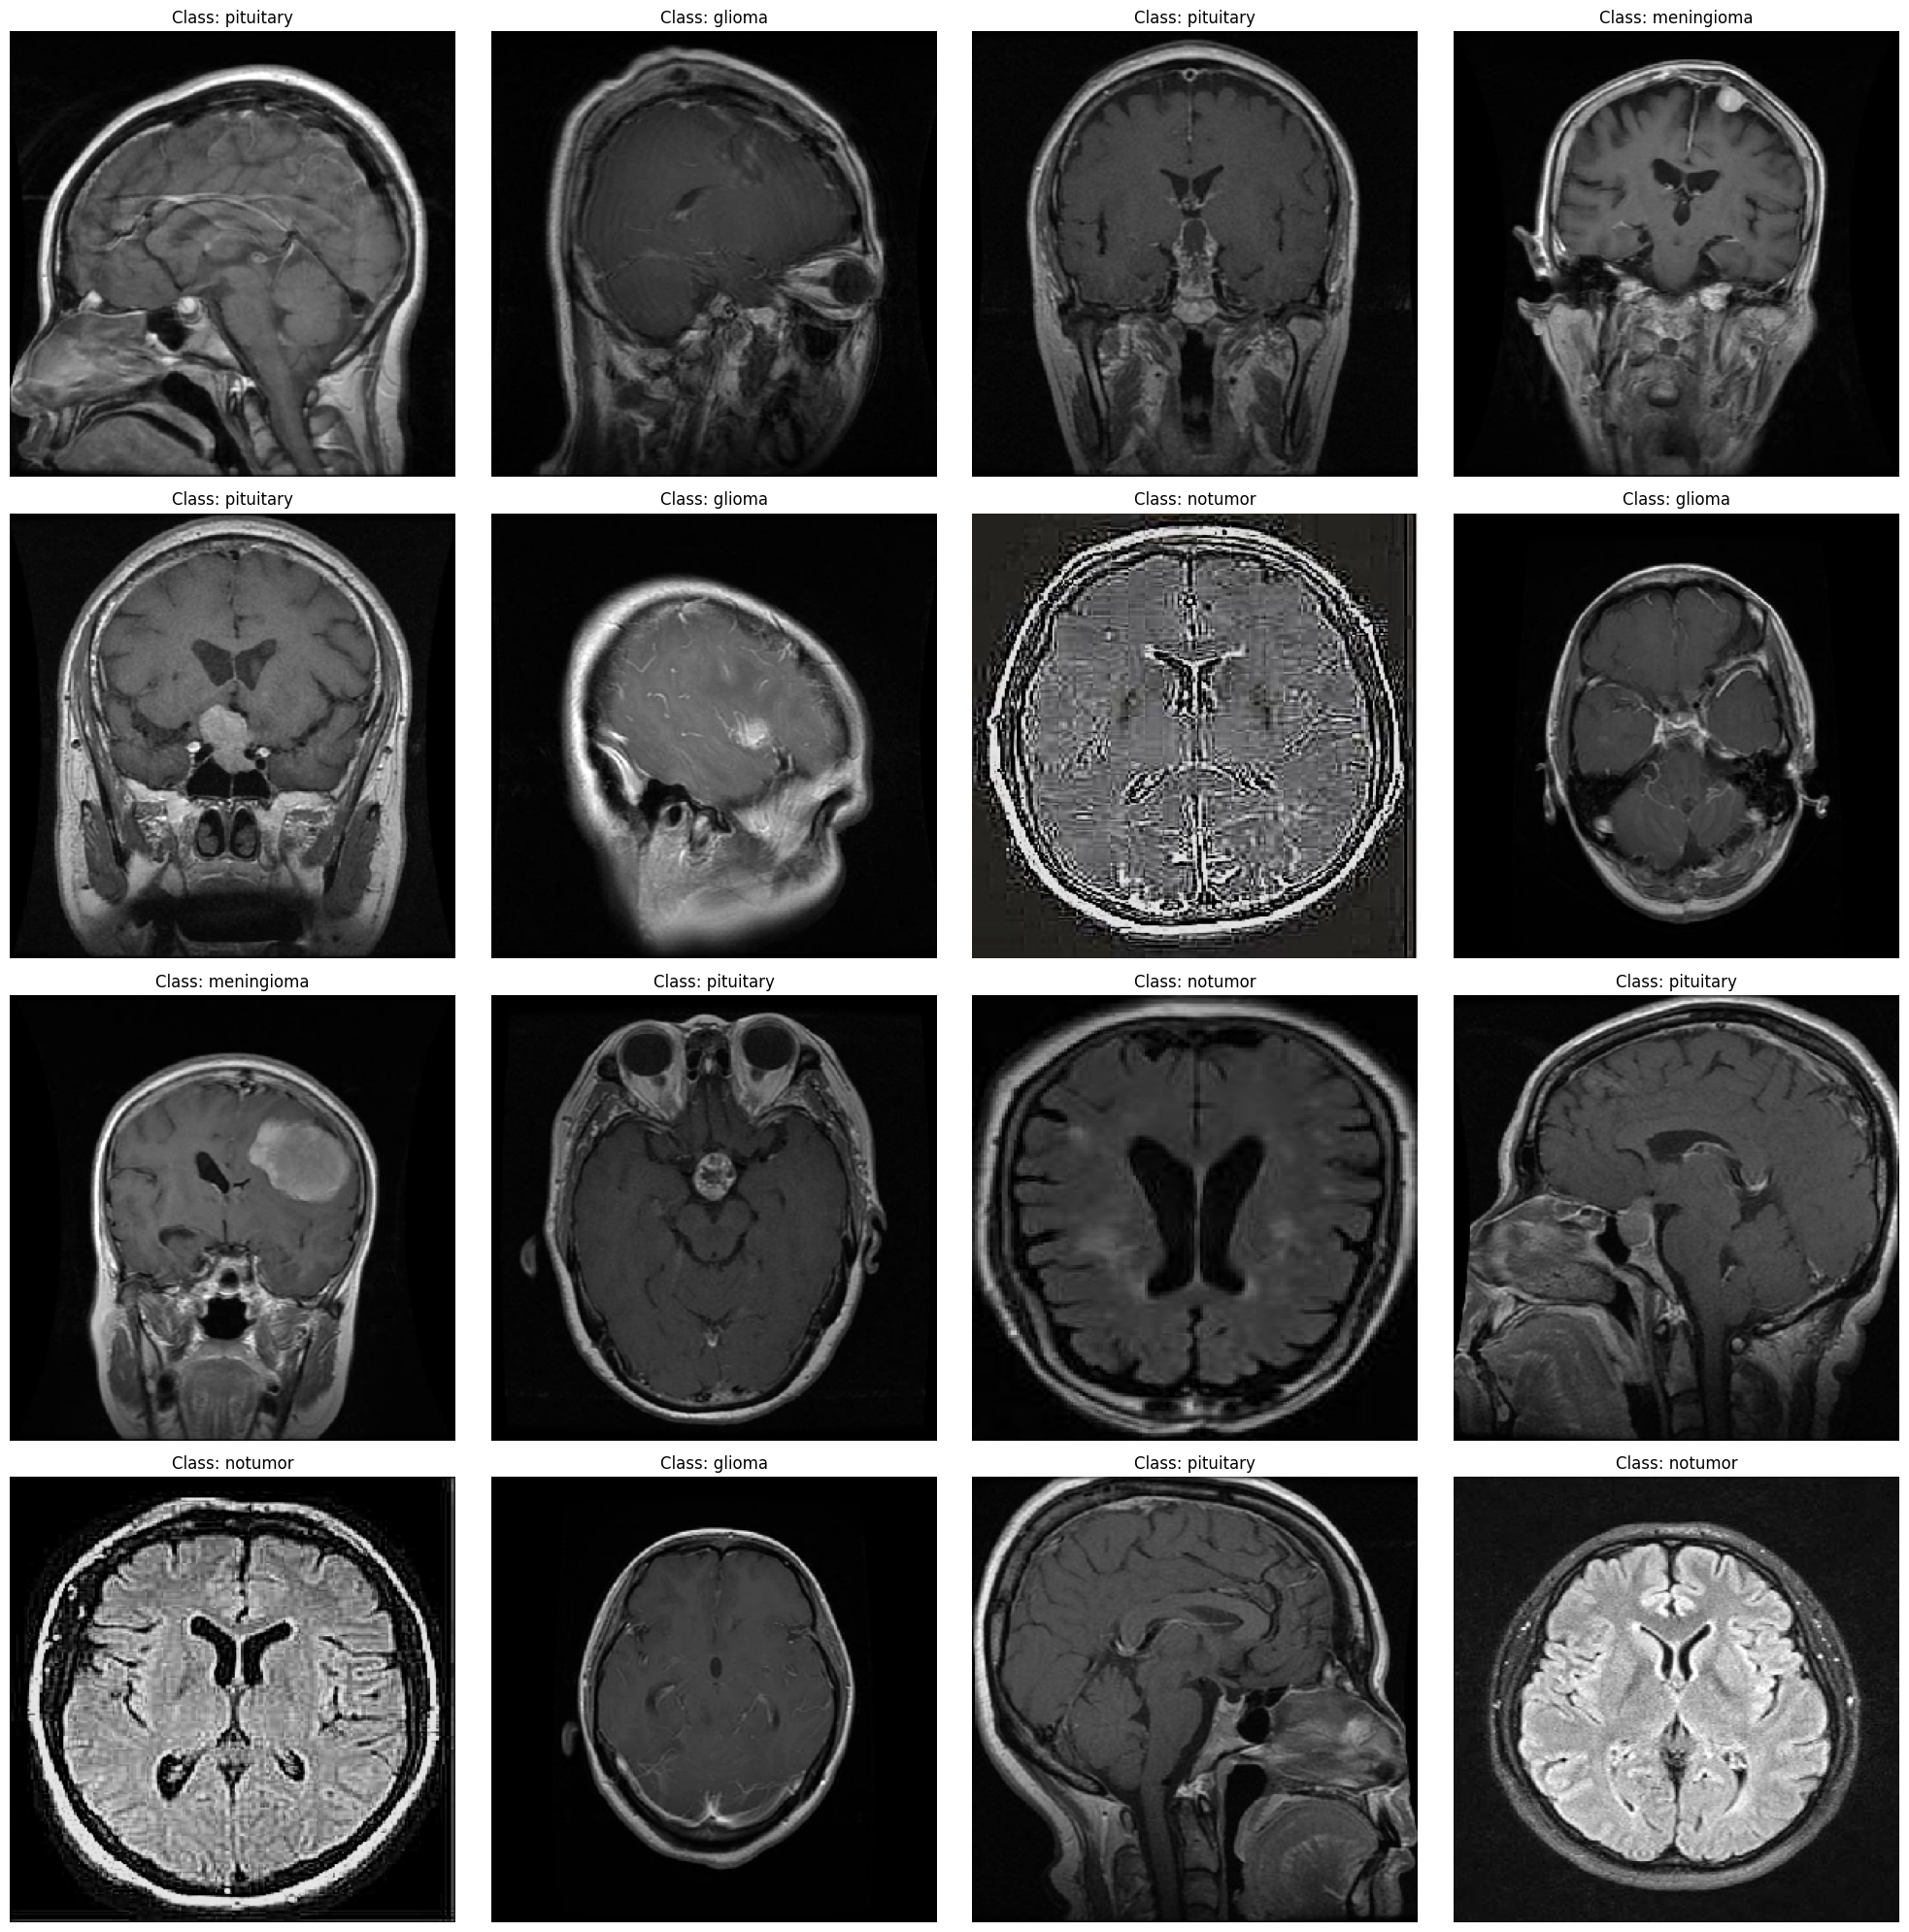

In [19]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    class_index = np.argmax(label)
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    index_position = class_indices.index(class_index)
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()


# XCeption Model

### Convolutional deeplearning model. Breaks down the overall pictures into smaller parts that the model will recognize more easily. Like Dog -> Fur, Snout, Paws, Tail, etc. 

### Let's use transfer learning


### MRI Scan -> Xception model -> Network with weights -> Probability Distribution (Predicted Class)

In [20]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([base_model, Flatten(), Dropout(rate=0.3), Dense(128, activation='relu'), Dropout(rate=0.25), Dense(4, activation='softmax')])

In [21]:
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Adamax decides the steps needed to take for the learning. Helps better learning effectiveness.

# Small learning rate = more accurate but longer
# Big learning rate = Shorter but may 

# Categorical Crossentropy Loss 
# Loss = -1[ 1 x log(0.50) + 0 x log(0.30) + 0 x log(0.10) + 0 x log(0.10)]
# Loss = 0.69....

In [22]:
# hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

In [23]:
# !nvidia-smi

In [24]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))
print("CUDA available:", tf.test.is_built_with_cuda())

TensorFlow version: 2.18.0
Available GPUs: []
CUDA available: False


In [25]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m : hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metrics], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Vaidation {metric.title()}')
    plt.xlabel('Epochs')
    plt. ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

NameError: name 'hist' is not defined

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

  1/179 ━━━━━━━━━━━━━━━━━━━━ 7:16 2s/step - accuracy: 0.1875 - loss: 2.5267 - precision: 0.1481 - recall: 0.1250

KeyboardInterrupt: 

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

c:\Users\brian\VisualStudioCode\Projects\BrainTumorClassification\tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())
    
    # Create figure
    plt.figure(figsize=(6, 8))
    
    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])
    
    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]
    
    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")
    
    # Plot prediction probabilities
    plt.subplot(1, 2, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")
    
    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPredicted tumor type: {predicted_class}")


In [ ]:
predict("./Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

# CNN Model

### Xception is also a convolution model. Can we use a CNN model with less layers? Cheaper and faster